# Exercise 3.12
We code up an approximation to the ode $x' = x(1 -x)$ with $x(0) = 0.1$ using the 2-stage explicit Runge-Kutta method described in the text. We run and plot the method on the interval $[0, 4]$ with time steps $\Delta t = 0.1, 0.01, 0.001$. 

We still assume that $x' = f(x), \quad x(0) = x_0$. The second order Runge-Kutta method is given in the book as
\begin{align}
x(t + \Delta t) &= x(t) + \frac{\Delta t}{2}[k_0 + k_1]\\
k_0 &= f(x(t)), \\
k_1 &- f(x(t) + \Delta t k_O)
\end{align}
Notice that this is a seperable equation and in fact the analytic solution is
\begin{align}
x(t) = \frac{e^t}{9 + e^t}
\end{align}

In [2]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 3]

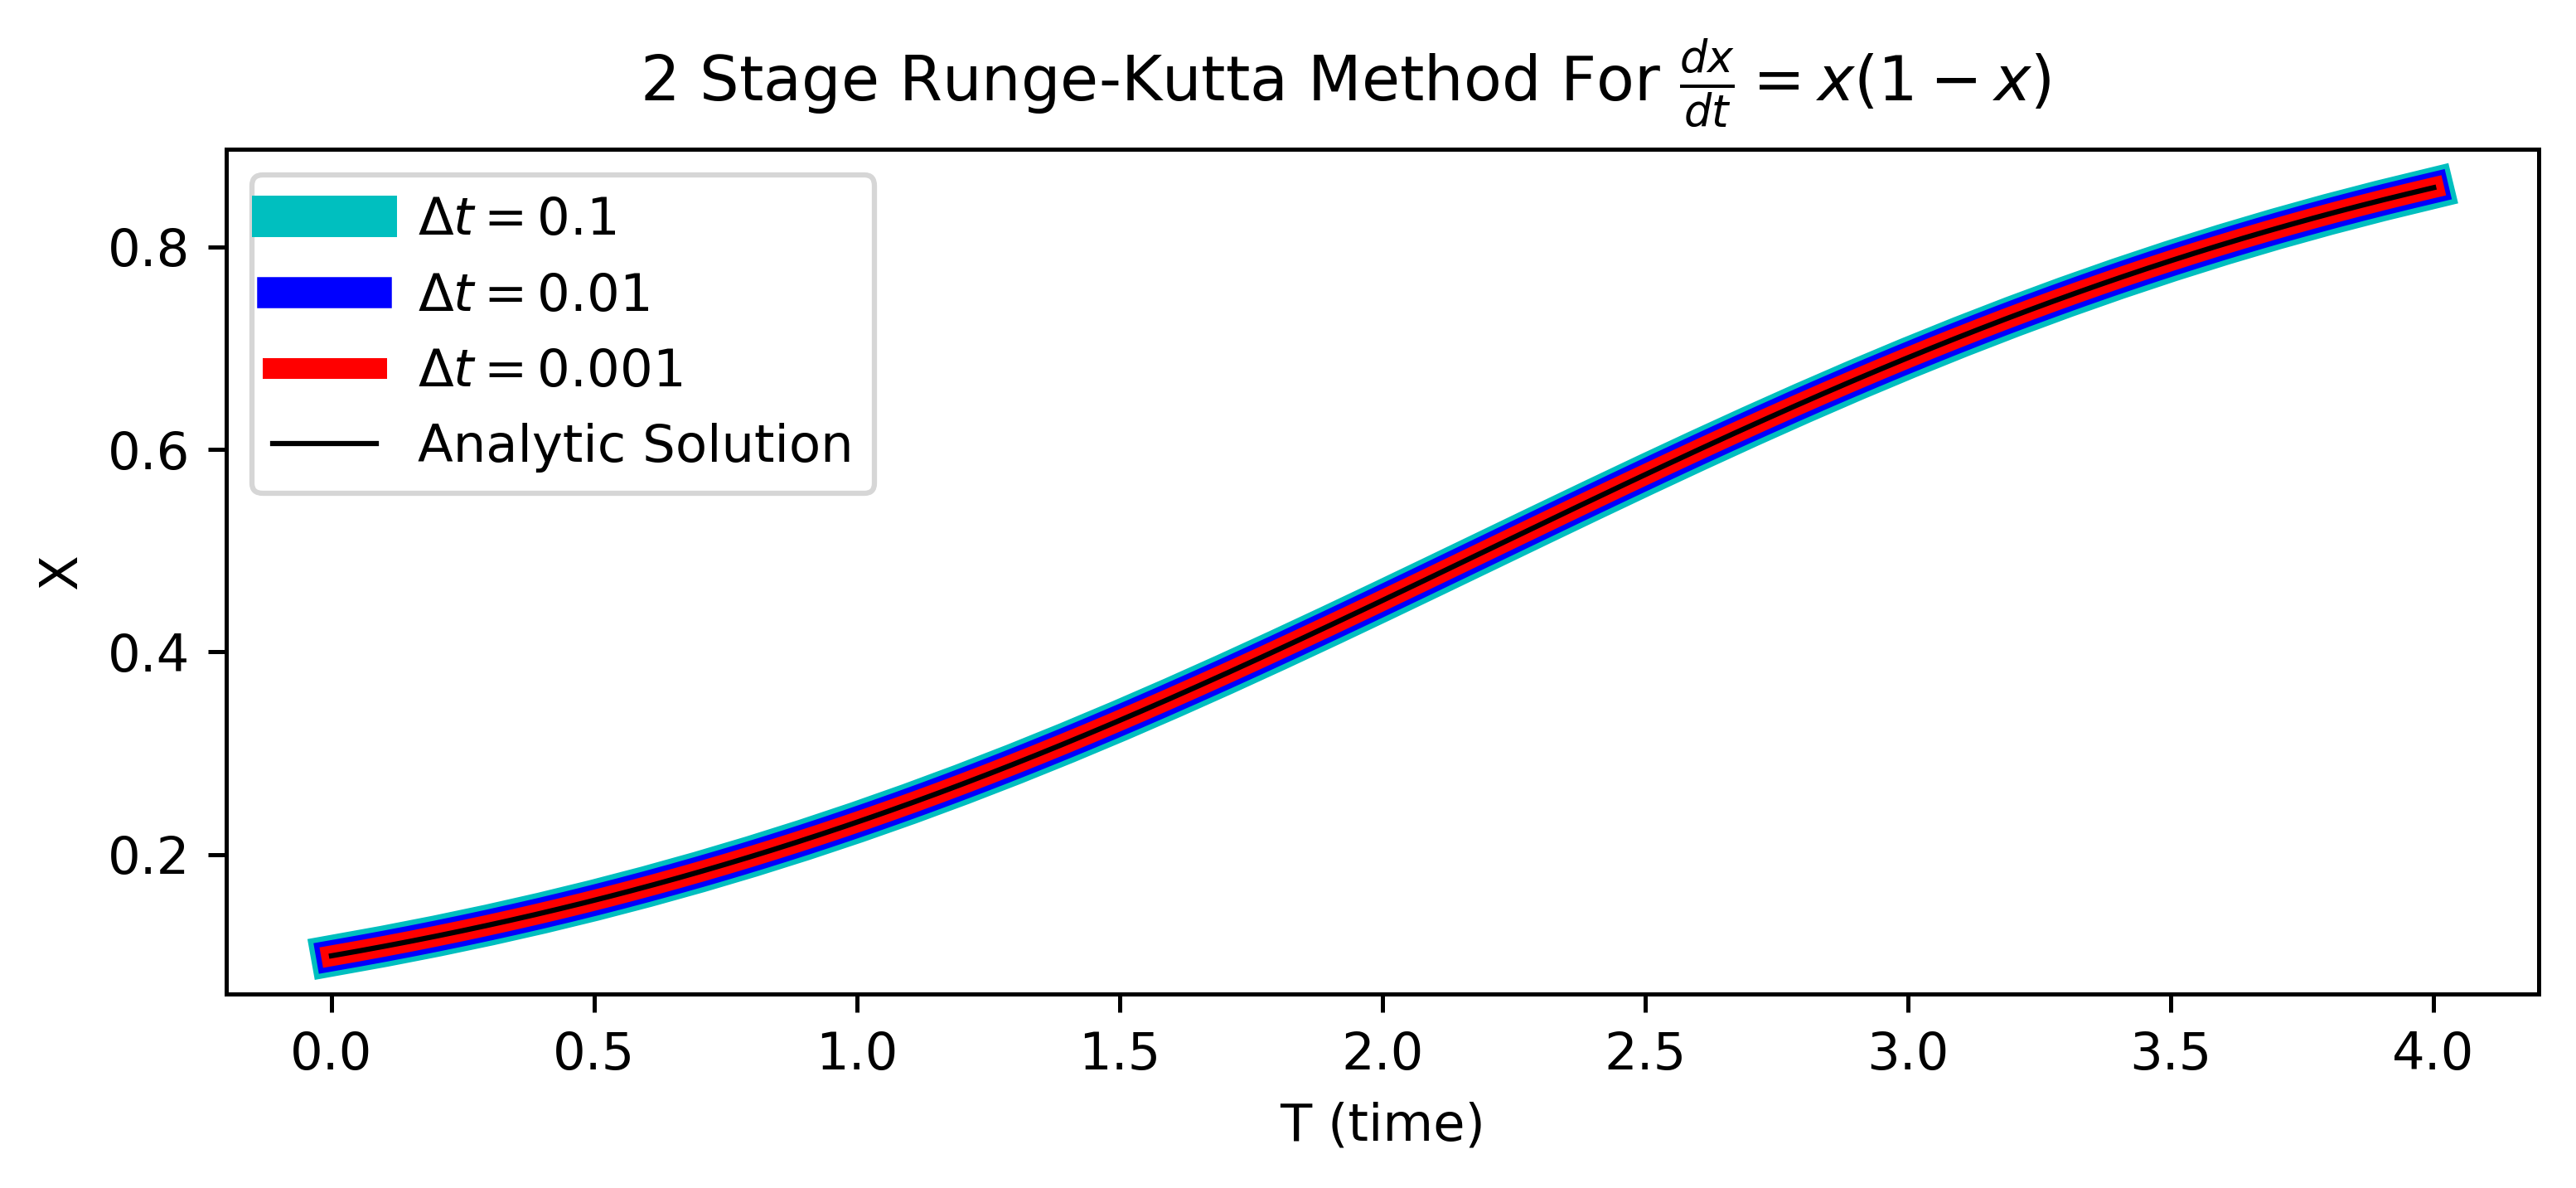

In [2]:
def runge_kutta_2(func, Delta, x0=0, t_span=[0, 4]):
    '''This function mimics the 2 stage Runge-Kutta method given in the book
        Paramaters:
            func (function): the right hand side of the ode
            Delta (float): the time step
            x0 (float): initial condition
            t_span (list): the time to span the solution over
        Returns:
            ts (np.ndarray): the time values for the solution
            xs (np.ndarray): the discrete x values
    '''
    #set update functions
    k0 = func
    k1 = lambda x: func(x + Delta * k0(x))
    
    #set initial arrays
    ts = np.arange(t_span[0], t_span[-1] + Delta, Delta)
    xs = np.zeros_like(ts)
    xs[0] = x0
    
    for i in range(1, xs.size):
        xs[i] = xs[i-1] + (Delta / 2) *(k0(xs[i-1]) + k1(xs[i-1]))
    
    return ts, xs
    

#define ode and anlaytic solution for plotting
ode = lambda x: x*(1 - x)
analytic = lambda t: np.exp(t) / ( 9 + np.exp(t))

Delta = [0.1, 0.01, 0.001]
colors = ['c-', 'b-', 'r-']
widths = [8, 6, 4]
fig = plt.figure()
fig.set_dpi(450)
ax = fig.add_subplot(111)

#plot ontop of each other to compare eyeball accuracy
for i in range(len(Delta)+1):
    if i == len(Delta):
        ax.plot(ts, analytic(ts), 'k-', lw=1, label='Analytic Solution')
        ax.legend(loc='best')
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
    else:
        ts, xs = runge_kutta_2(ode, Delta[i], x0 = 0.1)
        ax.plot(ts, xs, colors[i], lw=widths[i], label=r'$\Delta t = $' + str(Delta[i]))
        ax.legend(loc='best')
        
plt.suptitle(r'2 Stage Runge-Kutta Method For $\frac{dx }{dt} = x(1-x)$')
plt.show()

# Exercise 3.13

We now code up the 4-stage, 4th order Runge-Kutta scheme described in the text for the same ODE as in the previous problem. This is given in the book as
\begin{align}
k_0 &= f(x(t)),\\
k_1 &= f\left(x(t) + \frac{\Delta t}{2}k_0\right),\\
k_2 &=f\left(x(t) + \frac{\Delta t}{2}k_1\right),\\
k_3 &= f(x(t) + (\Delta 2)k_2),\\
x(t + \Delta t) &= x(t) + \frac{\Delta t}{6}(k_0 + 2k_1 + 2k_2 + k_3)
\end{align}

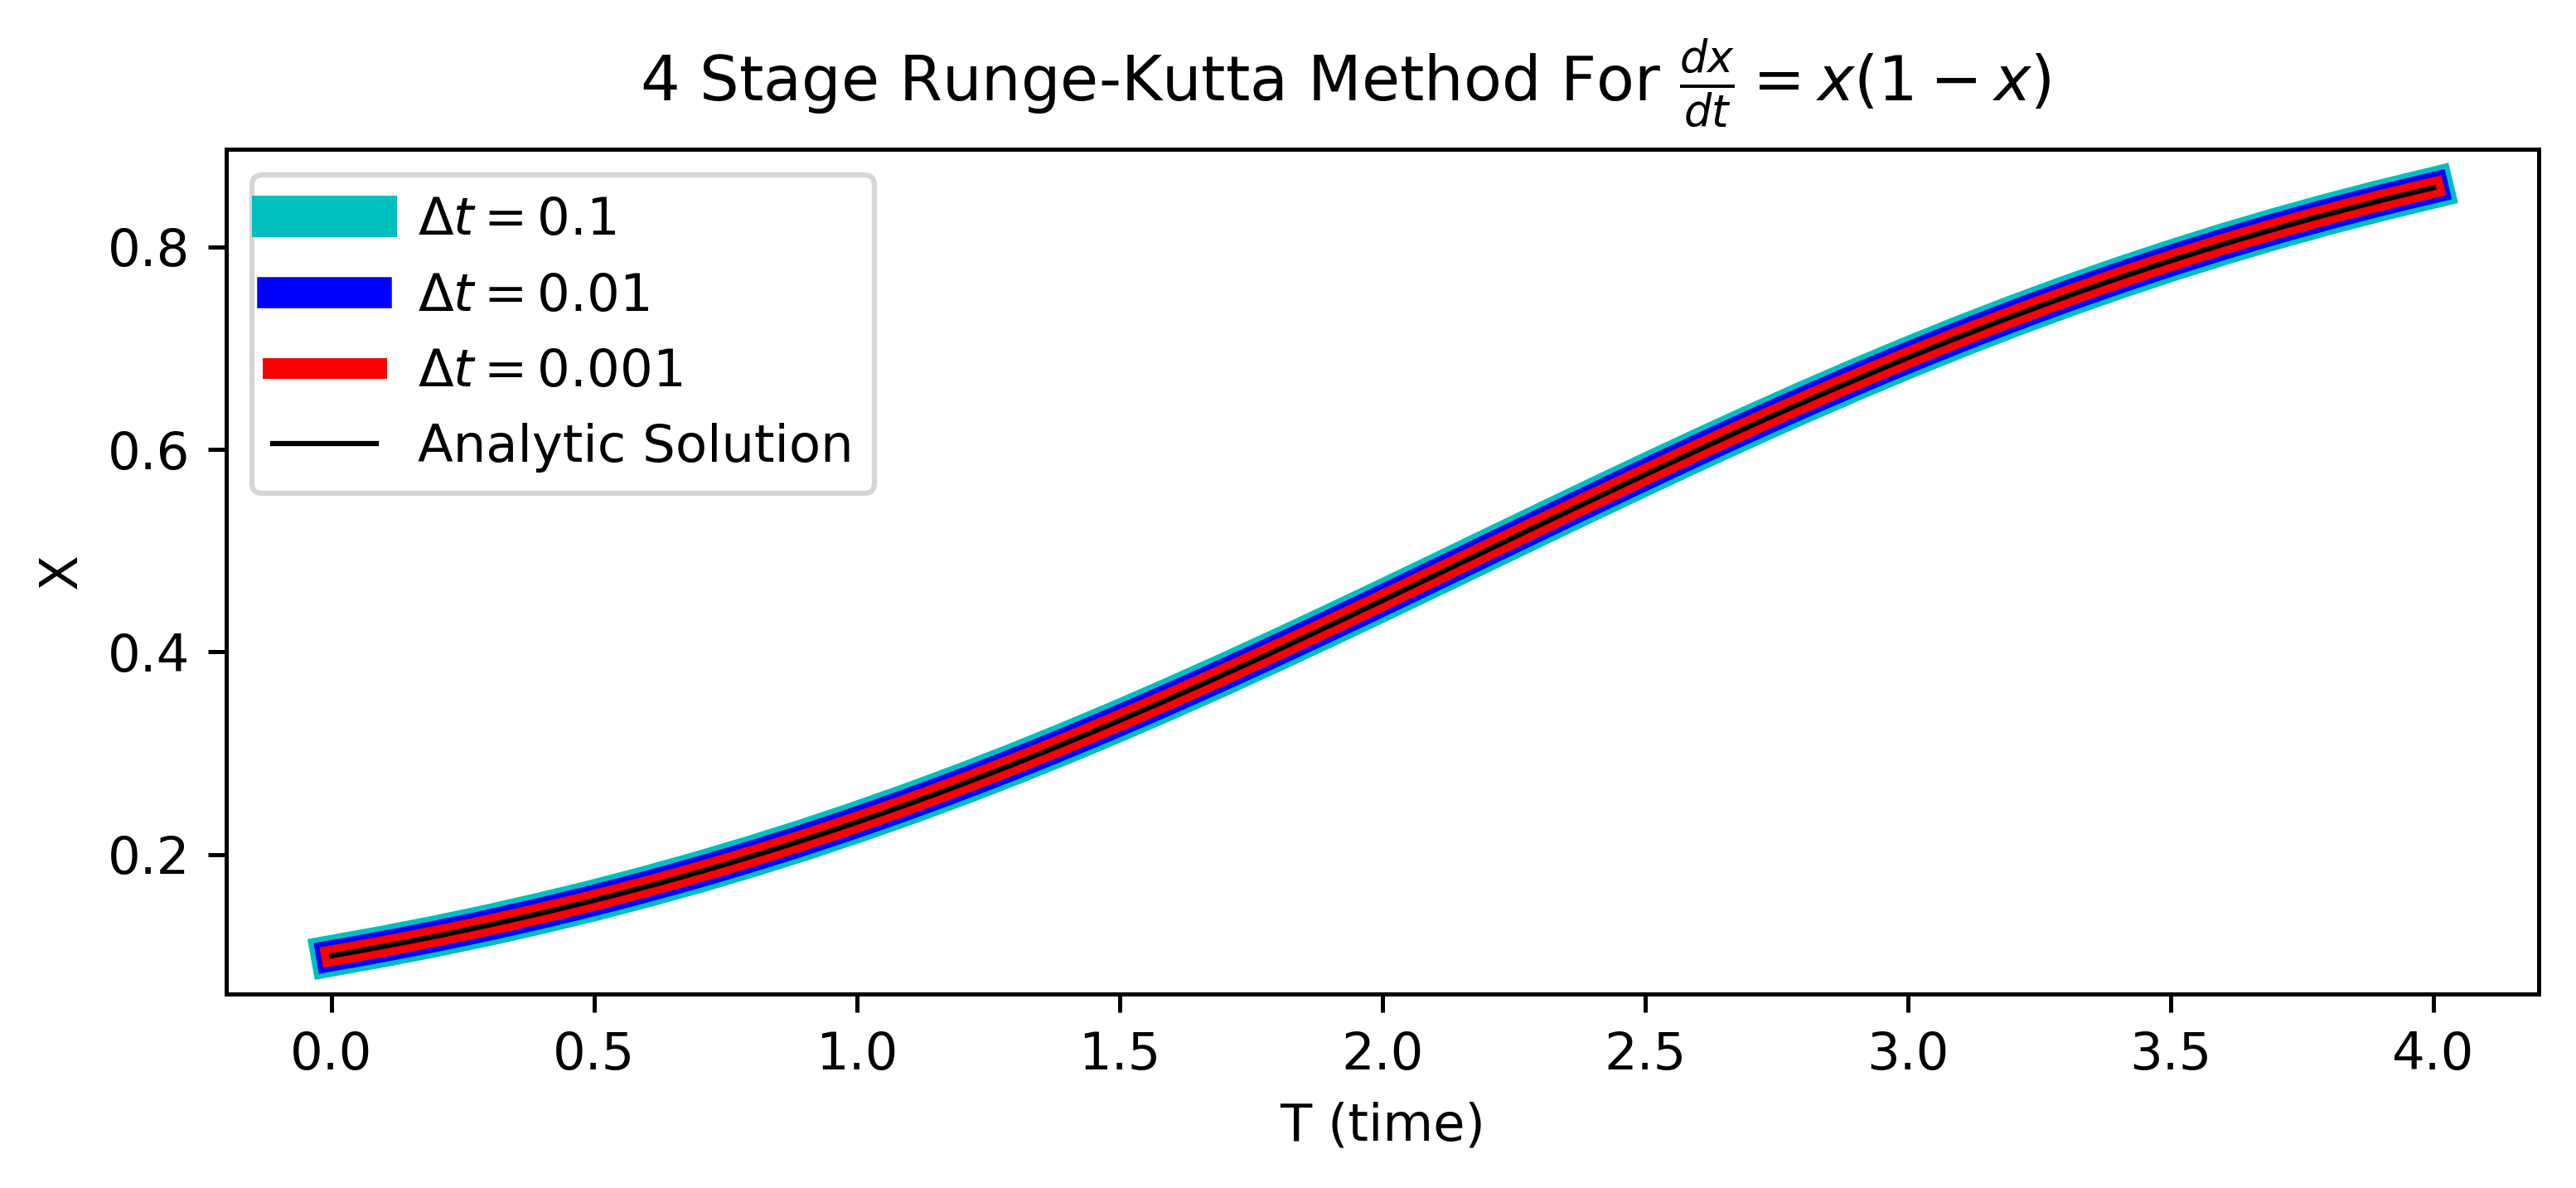

In [3]:
def runge_kutta_4(func, Delta, x0=0, t_span=[0, 4]):
    '''This function mimics the 4 stage Runge-Kutta method given in the book
        Paramaters:
            func (function): the right hand side of the ode
            Delta (float): the time step
            x0 (float): initial condition
            t_span (list): the time to span the solution over
        Returns:
            ts (np.ndarray): the time values for the solution
            xs (np.ndarray): the discrete x values
    '''
    #set update functions
    k0 = func
    k1 = lambda x: func(x + (Delta / 2) * k0(x))
    k2 = lambda x: func(x + (Delta /2) * k1(x))
    k3 = lambda x: func(x + Delta * k2(x))
    
    #set intiial arrays
    ts = np.arange(t_span[0], t_span[-1] + Delta, Delta)
    xs = np.zeros_like(ts)
    xs[0] = x0
    
    for i in range(1, xs.size):
        xs[i] = xs[i-1] + ((Delta / 6) * (k0(xs[i-1]) + 2*k1(xs[i-1])  
                                          + 2*k2(xs[i-1]) + k3(xs[i-1])))
    return ts, xs

#define ode and analytic solution for plotting
ode = lambda x: x*(1 - x)
analytic = lambda t: np.exp(t) / ( 9 + np.exp(t))

#plot ontop of each other to compare eyeball accuracy
Delta = [0.1, 0.01, 0.001]
colors = ['c-', 'b-', 'r-']
widths = [8, 6, 4]
fig = plt.figure()
fig.set_dpi(450)
ax = fig.add_subplot(111)

for i in range(len(Delta)+1):
    if i == len(Delta):
        ax.plot(ts, analytic(ts), 'k-', lw=1, label='Analytic Solution')
        ax.legend(loc='best')
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
    else:
        ts, xs = runge_kutta_4(ode, Delta[i], x0 = 0.1)
        ax.plot(ts, xs, colors[i], lw=widths[i], label=r'$\Delta t = $' + str(Delta[i]))
        ax.legend(loc='best')
        
plt.suptitle(r'4 Stage Runge-Kutta Method For $\frac{dx }{dt} = x(1-x)$')
plt.show()

# Exercise 3.14

We use a 2nd order Taylor series method to approximate the solution to $x'(t) = \sin(x(t))$ with $x(0) = 1$ for the time steps $\Delta = 0.1, 0.01, 0.001$. We consider the same taylor series expansion that the book gives
\begin{align}
x(t + \Delta t) &= x(t) + (\Delta t) x'(t) + \frac{(\Delta t)^2}{2} x''(t) + \mathcal{O}((\Delta t)^3)\\
&= x(t) + (\Delta t) f(x(t)) + \frac{(\Delta t)^2}{2} f(x(t)) f_x(x(t)) + \mathcal{O}((\Delta t)^3).
\end{align}
We can use this to construct a 2nd order Taylor series finite differennce to the ODE given above. Namely $x' = \sin(x)$ and $f_x = \cos(x)$ which gives
\begin{align}
x(t+ \Delta t) = x(t) + (\Delta t) \sin(x) + \frac{(\Delta t)^2}{2} \sin(x)\cos(x).
\end{align}
Notice again that the equation is seperable and has exact, analytic solution
\begin{align}
x(t) = 2\cot^{-1}\left(e^{-t} \cot\left(\frac{1}{2}\right)\right)
\end{align}

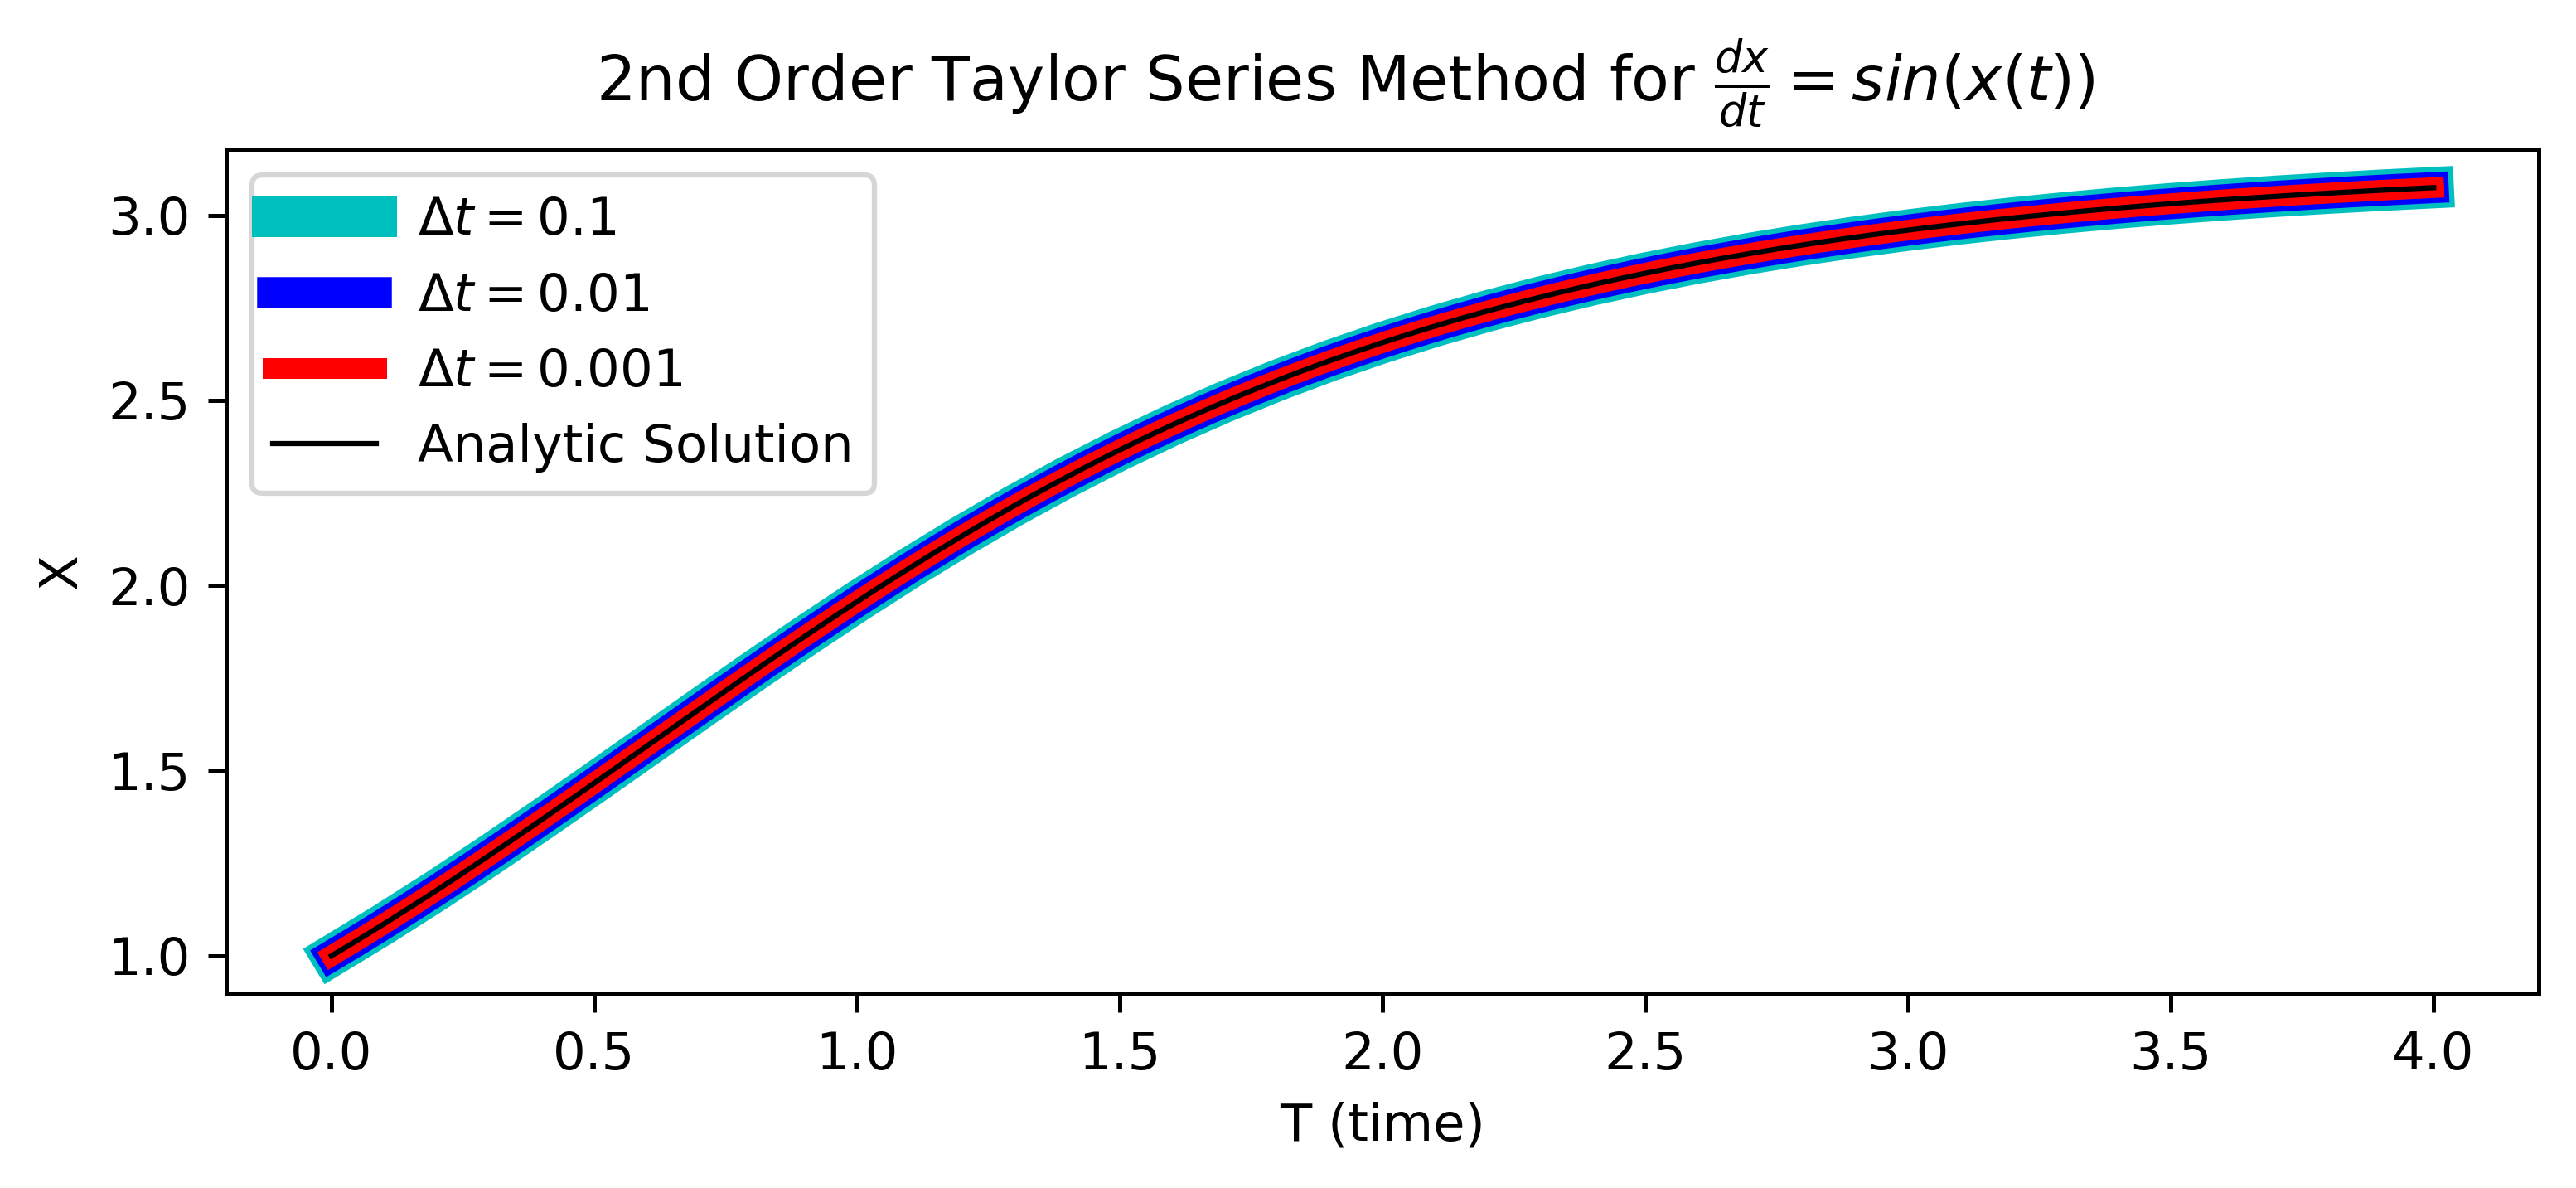

In [10]:
def taylor_2(func, Df, Delta, x0=0, t_span=[0, 4]):
    '''This function mimics the 2 stage Taylor series method
        Paramaters:
            func (function): the right hand side of the ode
            Df (function): the derivative of func
            Delta (float): the time step
            x0 (float): initial condition
            t_span (list): the time to span the solution over
        Returns:
            ts (np.ndarray): the time values for the solution
            xs (np.ndarray): the discrete x values
    '''

    
    #set intiial arrays
    ts = np.arange(t_span[0], t_span[-1] + Delta, Delta)
    xs = np.zeros_like(ts)
    xs[0] = x0
    
    #iterate through xs and set next values
    for i in range(1, xs.size):
        xs[i] = xs[i-1] + Delta * func(xs[i-1]) + (Delta)**2 /2 * func(xs[i-1])*Df(xs[i-1])
        
    return ts, xs

#define ode and analytic solution for plotting
ode = lambda x: np.sin(x)
Df = lambda x: np.cos(x)
#use sympy cause they have a built in acot function
t = sy.symbols('t')
expr = 2*sy.acot(sy.exp(-t) * sy.cot(sy.Rational(1, 2)))

#plot ontop of each other to compare eyeball accuracy
Delta = [0.1, 0.01, 0.001]
colors = ['c-', 'b-', 'r-']
widths = [8, 6, 4]
fig = plt.figure()
fig.set_dpi(450)
ax = fig.add_subplot(111)

for i in range(len(Delta)+1):
    if i == len(Delta):
        xs = np.array([expr.evalf(subs={t:t_val}) for t_val in ts ])
        ax.plot(ts,xs, 'k-', lw=1, label='Analytic Solution')
        ax.legend(loc='best')
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
    else:
        ts, xs = runge_kutta_4(ode, Delta[i], x0 = 1)
        ax.plot(ts, xs, colors[i], lw=widths[i], label=r'$\Delta t = $' + str(Delta[i]))
        ax.legend(loc='best')
        
plt.suptitle(r'2nd Order Taylor Series Method for $\frac{dx }{dt} = sin(x(t))$')
plt.show()

# Exercise 3.15





In [21]:
f, fp, fpp = sy.symbols('f, fp, fpp')
up, upp, uppp = sy.symbols('up, upp, uppp')
k0, k1, k2 = sy.symbols('k0, k1, k2')
delta = sy.symbols('Delta')
w0, w1, w2 = sy.symbols('w0, w1, w2')
b10, b20, b21 = sy.symbols('b10, b20, b21')




main = up + delta*sy.Rational(1, 2) * upp + (delta)**2 * sy.Rational(1, 6) * uppp - w0*k0 - w1*k1 - w2*k2

expr_k0 = up
expr_k1 = up + delta * upp + (delta)**2 * b10*2 * up**2*fpp * sy.Rational(1, 2)

expr_k2 = up + delta*(b20*up+b21*k1)*fp +(delta * (b20 * up + b21 *k1))**2 * fpp* sy.Rational(1, 2)

new_k2 = expr_k2.subs({k1:expr_k1})

new_main = main.subs({k0: expr_k0, k1: expr_k1, k2: new_k2})

final = sy.simplify(new_main)

print(sy.latex(final))

\frac{\Delta^{2} uppp}{6} + \frac{\Delta upp}{2} - up w_{0} + up - w_{1} \left(\Delta^{2} b_{10} fpp up^{2} + \Delta upp + up\right) - \frac{w_{2} \left(\Delta^{2} fpp \left(b_{20} up + b_{21} \left(\Delta^{2} b_{10} fpp up^{2} + \Delta upp + up\right)\right)^{2} + 2 \Delta fp \left(b_{20} up + b_{21} \left(\Delta^{2} b_{10} fpp up^{2} + \Delta upp + up\right)\right) + 2 up\right)}{2}


Here we derive the linear system of equations for the coefficients of a 3-stage, 3rd order Runge-Kutta scheme. Keep in mind this doesn't mean we need to find the coefficients themselves (and thus the method), just the system of equations that would let us define the method. Once again, we assume an implicit method. That is, 
\begin{align*}
u(t + \Delta t) &= u(t) + (\Delta t) \phi(u(t); \Delta t)\\
\phi(u(t); \Delta t) &= \sum_{i=0}^{q-1} w_i k_i,\\
k_i &= 
\begin{cases}
f\left(u(t) + \Delta t \sum_{j=0}^{i-1} \beta_{i j} k_j\right) & \text{ explicit }\\
f\left(u(t) + \Delta t \sum_{j=0}^{q-1} \beta_{i j}k_j\right) & \text{ implicit }
\end{cases}
\end{align*}
For our 3rd order method we get that
\begin{align*}
\phi(u(t); \Delta t) = w_0 k_0 + w_1 k_1 + w_2 k_2,
\end{align*}
where
\begin{align*}
k_0 &= f(u(t))\\
k_1 &= f(u(t) + \Delta t \beta_{10}k_0) = f(u(t) + \Delta t \beta_{10}f(u(t)))\\
k_2 &= f(u(t) + \Delta t \beta_{20}k_0 + \Delta t \beta_{21}k_1)\\
&= f(u(t) + \Delta t \beta_{20}f(u(t)) + \Delta t \beta_{21} f(u(t) + \Delta t \beta_{10}f(u(t))))
\end{align*}
and the identities we will use in the Taylor series expansions are
\begin{align*}
    f(u(t)) &= u'(t)\\
    u'(t) f_u(u(t)) &= u''(t)\\
    u''(t) f_u(u(t)) + (u'(t))^2 f_{uu}(u(t)) &= u^{(3)}(t)
\end{align*}
where $f_{uu}$ denotes the second derivative of $f$ with respect to u.
We now calculate the truncation error. 
\begin{align*}
    \tau(t) &= \frac{u(t + \Delta t) - u(t)}{\Delta t} - w_0k_0 - w_1k_1 - w_2k_2\\
    &= \frac{u(t) + \Delta t u'(t) + \frac{(\Delta t)^2}{2}u''(t) + \frac{(\Delta t)^3}{6}u^{(3)}(t) + \mathcal{O}((\Delta t)^4)-u(t)}{\Delta t} - w_0u'(t) -w_1k_1 - w_2k_2\\
    &= u'(t) + \frac{\Delta t}{2}u''(t) + \frac{(\Delta t)^2}{6}u^{(3)}(t) + \mathcal{O}((\Delta t)^3) - w_0 u'(t) - w_1k_1 -w_2k_2\\
    &= u'(t) + \frac{\Delta t}{2}u''(t) + \frac{(\Delta t)^2}{6}u^{(3)}(t) + \mathcal{O}((\Delta t)^3) - w_0 u'(t) - w_1k_1 - w_2k_2f.
\end{align*}
We can now use Taylor expansions on each $k_i$
\begin{align*}
    k_1 &= f(u(t) + \Delta t\beta_{10}k_0) \\
    &= f(u(t)) + \Delta t \beta_{10}k_0 f'(u(t)) + \frac{(\Delta t \beta_{10} k_0)^2}{2}f''(u(t)) + \mathcal{O}((\Delta t)^3)\\
    &= f(u(t)) + \Delta t\beta_{10}u'(t)f'(u(t)) + \frac{(\Delta t \beta_{10})^2 (u'(t))^2}{2}f''(u(t)) + \mathcal{O}((\Delta t)^3) \\
    &= u'(t) + \Delta t u''(t) + \frac{(\Delta t)^2 \beta_{10}^2}{2}\cdot \frac{(u'(t))^2 f''(u(t))}{2} + \mathcal{O}((\Delta t)^3)\\
    &=
\end{align*}

\begin{align*}
    k_2 &= f(u(t) + \Delta t \beta_{20}k_0 + \Delta t \beta_{21}k_1)\\
    &= f(u(t) + \Delta t(\beta_{20}k_0 + \beta_{21}k_1))\\
    &= f(u(t)) + \Delta t(\beta_{20}k_0 + \beta_{21}k_1)f'(u(t)) + \frac{(\Delta t(\beta_{20}k_0 + \beta_{21}k_1))^2}{2}f''(u(t)) + \mathcal{O}((\Delta t)^3)\\
    &= u'(t) + \Delta t(\beta_{20}u'(t) + \beta_{21}k_1) f'(u(t)) +\frac{(\Delta t(\beta_{20}u'(t) + \beta_{21}k_1))^2}{2}f''(u(t))+ \mathcal{O}((\Delta t)^3)\\
    &= u'(t) + \Delta t\beta_{20} u''(t) + \Delta t \beta_{21}k_1 f'(u(t)) + \frac{(\Delta t)^2}{2} \left(\frac{\beta_{20}^2 (u'(t))^2}{2} + \beta_{20}\beta_{21}u'(t)k_1 + \frac{\beta_{21}^2 k_1^2}{2}\right)f''(u(t))\\
    &+ \mathcal{O}((\Delta t)^3)
\end{align*}
Going term by term in $k_2$ gives us
\begin{align*}
    f'(u(t))k_1 &= f'(u(t))\left[u'(t) + \Delta t u''(t) + \frac{(\Delta t)^2 \beta_{10}^2}{2}\cdot \frac{(u'(t))^2 f''(u(t))}{2} + \mathcal{O}((\Delta t)^3)\right]\\
    &= u''(t) + \Delta t u''(t) f'(u(t)) + \frac{(\Delta t)^2 \beta_{10}^2}{2}\cdot \frac{(u'(t))^2 f''(u(t)f'(u(t)))}{2} + \mathcal{O}((\Delta t)^3)
\end{align*}

which gives our final form as
\begin{align*}
    \tau(t) &=\frac{\Delta t^{2} u'''(t)}{6} + \frac{\Delta t u''(t)}{2} - u'(t) w_{0} + u'(t) - w_{1} \left(\Delta t^{2} \beta_{10} f''(u(t)) (u'(t))^{2} + \Delta t u''(t) + u'(t)\right)\\
    &- \frac{w_{2} \left(\Delta t^{2} f''(u(t)) \left(\beta_{20} u'(t) + \beta_{21} \left(\Delta t^{2} \beta_{10} f''(u(t)) up^{2} + \Delta t u''(t) + u'(t)\right)\right)^{2}\right)}{2}\\
    &+\frac{w_2 \left(2 \Delta t f'(t) \left(\beta_{20} u'(t) + \beta_{21} \left(\Delta t^{2} \beta_{10} f''(u(t)) (u'(t))^{2} + \Delta tu''(t) + u'(t)\right)\right) + 2 up\right)}{2}
\end{align*}